In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# parameters
t_duration = 1
t_step = 1e-6
n_data=int(t_duration/t_step)

# time array in integer from 0 to 1e6 but last sample is absent
t_array= np.arange(n_data)*t_step

# filter parameter values
C= 1000e-6
R= 0.05
L= 0.001

# Voltage input
f= 50
omega= 2*np.pi*f
mag= np.sqrt(2)*240

ip_voltage_signal = mag*np.sin(t_array*omega) + 0.1*mag*np.sin(t_array*15*omega)


In [3]:
# sampling input voltage signal

t_sample= 200e-6 # 5 KHz
n_skip = int(t_sample/t_step)

tsample_array= t_array[::n_skip]
ip_voltage_samples = ip_voltage_signal[::n_skip]

In [4]:
# initialize output
op_voltage_samples= np.zeros(ip_voltage_samples.size)
# filter input 
u= np.zeros(3)
y= np.zeros(3)
# y[0] to derive 
# calculate output
for volt_index, volt_value in np.ndenumerate(ip_voltage_samples):
    u[0]= volt_value
    y[0]= ((1/(L*C))*(u[0]+2*u[1]+u[2])-(-2*(2/t_sample)*(2/t_sample)+(2/(L*C)))*y[1]- ((2/t_sample)*(2/t_sample)- (R/L)*(2/t_sample)+ (1/(L*C)))*y[2])/((2/t_sample)*(2/t_sample)+(R/L)*(2/t_sample)+(1/(L*C)))
    u[2]= u[1]
    y[2]= y[2]
    u[1]= u[0]
    y[1]= u[0]
    op_voltage_samples[volt_index]= y[0]

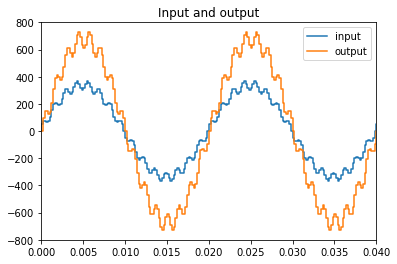

In [5]:
plt.figure()
plt.plot(tsample_array, ip_voltage_samples, label="input",ds="steps")
plt.plot(tsample_array, op_voltage_samples, label="output",ds="steps")
plt.xlim([0.0,0.04])
plt.title("Input and output")
plt.legend()
plt.show()

In [6]:
# peak voltage= peak_current/omega*C, min voltage= -peak_current /omega*C
# Vpeak-peak= V1-V2
# here one issue is there -"output Voltage has a dc offset even though the input is pure AC"
# this model is repeatedly executed within a Interrupt service routine
# ISR is configured to run with a timer interupt to ensure sampling occurs at regular intervals